## Create a vmd movie from .xyz file

### Create molecule and scan two coordinates

Here we create a molecule from a smiles string and visualize its graph and 3D representation.
We select two bonds to rotate around and scan the coordinates.
The scan is written to an `xyz` file which can be read by `vmd`.

['Bond(0, 1)', 'Bond(1, 2)', 'Bond(2, 3)', 'Bond(3, 4)', 'Bond(4, 5)', 'Bond(5, 6)', 'Bond(5, 11)', 'Bond(6, 7)', 'Bond(7, 8)', 'Bond(7, 8)', 'Bond(8, 9)', 'Bond(11, 12)', 'Bond(12, 13)']


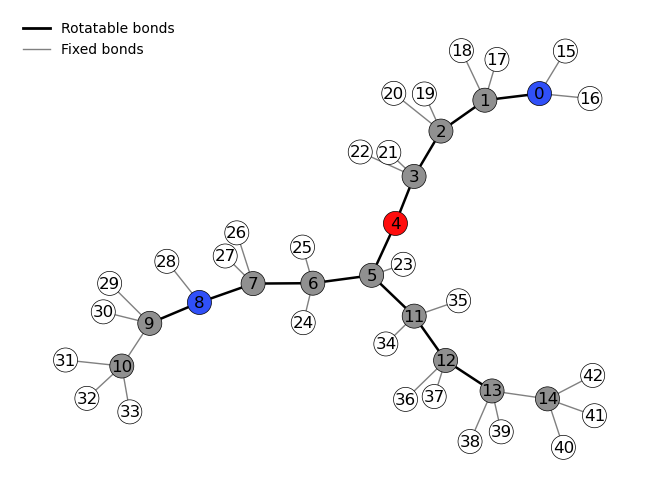

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

111600

In [1]:
from pathlib import Path

from tqchem.molgraph import molecularSystem
from tqchem.internal_coordinates import MolecularGrid
from tqchem.chem import xyz_contents
from tqchem.viewer import plot_3D_molecule
from itertools import product


molecule = molecularSystem("NCCCOC(CCNCC)CCCC")
n_gridpoints = 12
shift_by_reference = True
molecule_grid = MolecularGrid(molecule, shift_by_reference)
print(molecule_grid.variable_atom_indices())

molecule.draw()
view = plot_3D_molecule(molecule.ase)
view.show()

bond_index1 = 3
bond_index2 = -1

xyzs = []

grid = molecule_grid.shape()
superindex = [0] * molecule_grid.n_variables()
for i, j in product(grid[bond_index1], grid[bond_index2]):
    superindex[bond_index1] = i
    superindex[bond_index2] = j
    molecule = molecule_grid(superindex)
    xyzs.append(xyz_contents(molecule.ase))

output_name = "aminophenol_derivative"
output_dir = Path(".output_movie")
output_dir.mkdir(exist_ok=True)
trajectory_file = output_dir / f"{output_name}.xyz"
trajectory_file.write_text("".join(xyzs))

In [2]:
# 1.) make sure that vmd is installed and the path is set (e.g. softlink to /usr/local/bin/vmd)
# 2.) set VMDDIR to the path of the VMD installation. Without naming, the default is /usr/local/bin/scripts/vmd/vmdinit.tcl

# Set the VMDDIR environment variable to the path of the VMD installation
from pathlib import Path
import os

vmd_path = Path("/Applications/VMD_1.9.4a57-arm64-Rev12.app/Contents/vmd")
os.environ["vmd_path"] = str(vmd_path)

Path("vmd_movie").mkdir(exist_ok=True)

!$vmd_path/vmd_MACOSXARM64 -e movie.tcl > movie.out
!magick -delay 2 vmd_movie/snapshot.*.rgb movie.gif

2024-11-13 16:19:12.547 vmd_MACOSXARM64[47881:347395] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-13 16:19:12.547 vmd_MACOSXARM64[47881:347395] +[IMKInputSession subclass]: chose IMKInputSession_Modern
